In [80]:
import pandas as pd
import numpy as np
import keras
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [81]:
# Drop unwanted columns
train_data = train_data.drop(columns=['Name',"Ticket","PassengerId"])
test_passenger_id = test_data["PassengerId"]
test_data = test_data.drop(columns=['Name',"Ticket","PassengerId"])

In [82]:
# One hot to categorical variables
def append_one_hot(data, column, prefix=None):
    one_hot = pd.get_dummies(data[column],prefix=prefix)
    data = data.join(one_hot)
    data = data.drop(columns=[column])
    return data

train_data = append_one_hot(train_data,"Sex","Sex")
train_data = append_one_hot(train_data,"Pclass","Pclass")
print(train_data.columns)
test_data = append_one_hot(test_data,"Sex","Sex")
test_data = append_one_hot(test_data,"Pclass","Pclass")
print(test_data.columns)

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked',
       'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3'],
      dtype='object')
Index(['Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'Sex_female',
       'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3'],
      dtype='object')


In [83]:
nas = pd.concat([train_data.isnull().sum(), test_data.isnull().sum()],axis=1,keys=['Train Dataset', 'Test Dataset'])
print('Nan in the data sets')
print(nas[nas.sum(axis=1) > 0])

Nan in the data sets
          Train Dataset  Test Dataset
Age                 177          86.0
Cabin               687         327.0
Embarked              2           0.0
Fare                  0           1.0


/Users/ethi/miniconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [84]:
#Fill na of ages
train_random_ages = np.random.randint(train_data["Age"].mean() - train_data["Age"].std(),
                                          train_data["Age"].mean() + train_data["Age"].std(),
                                          size = train_data["Age"].isnull().sum())

test_random_ages = np.random.randint(train_data["Age"].mean() - train_data["Age"].std(),
                                          train_data["Age"].mean() + train_data["Age"].std(),
                                          size = test_data["Age"].isnull().sum())

train_data["Age"][np.isnan(train_data["Age"])] = train_random_ages
test_data["Age"][np.isnan(test_data["Age"])] = test_random_ages

/Users/ethi/miniconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/ethi/miniconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [85]:
# Remove Nan values or columns
train_data = train_data.drop(columns=["Cabin"])
test_data = test_data.drop(columns=["Cabin"])

In [86]:
train_data["Embarked"].fillna('S', inplace=True)
 
test_data = append_one_hot(test_data,"Embarked","Embarked")

In [87]:
train_data = train_data.drop(columns=["Sex_female"])
test_data = test_data.drop(columns=["Sex_female"])

In [88]:
test_data["Fare"].fillna(test_data["Fare"].median(), inplace=True)

In [89]:
train_columns = train_data.columns.values[1:]

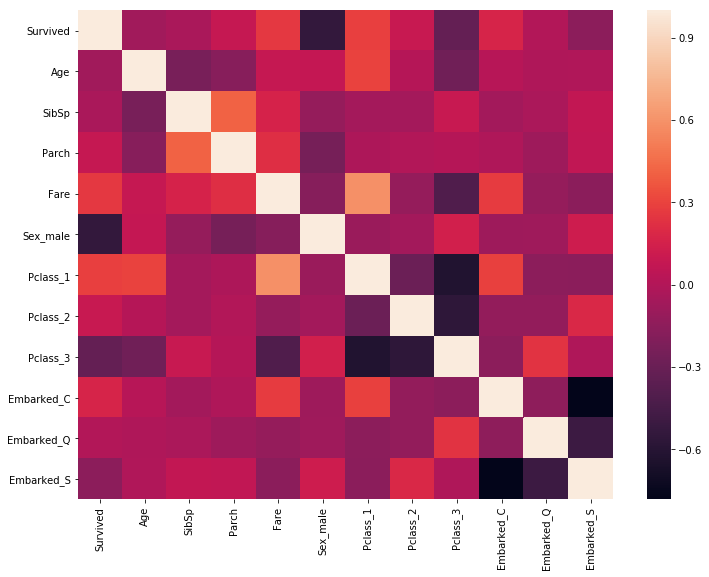

In [90]:
correlation_matrix = train_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
# sns.heatmap(corrmat, vmax=.8, square=True);
sns.heatmap(correlation_matrix)
plt.show()


In [122]:
X=train_data[train_columns]
y=train_data['Survived']
# Reference
# https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
#print(result.summary())

# Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(penalty = 'l2', C = .5,random_state = 0)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Optimization terminated successfully.
         Current function value: 0.441199
         Iterations 6
Accuracy of logistic regression classifier on test set: 0.81


Optimization terminated successfully.
         Current function value: 0.441199
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      881
Method:                           MLE   Df Model:                            9
Date:                Wed, 27 Jun 2018   Pseudo R-squ.:                  0.3375
Time:                        17:47:55   Log-Likelihood:                -393.11
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 1.104e-80
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.0358      0.007     -4.810      0.000      -0.050      -0.021
SibSp         -0.3171      0.

/Users/ethi/miniconda2/envs/py36/lib/python3.6/site-packages/statsmodels/base/model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/Users/ethi/miniconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/ethi/miniconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/ethi/miniconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


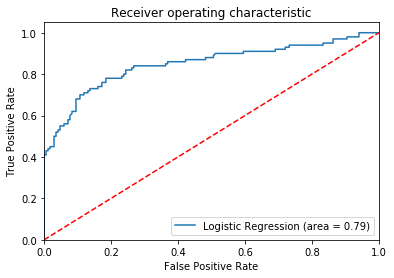

In [91]:
# Cross validation

from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))


#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

#F1
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


#ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [92]:
y_pred = logreg.predict(test_data)

In [93]:
test_data.head(10)

,Age,SibSp,Parch,Fare,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,34.5,0,0,7.8292,1,0,0,1,0,1,0
1,47.0,1,0,7.0000,0,0,0,1,0,0,1
2,62.0,0,0,9.6875,1,0,1,0,0,1,0
3,27.0,0,0,8.6625,1,0,0,1,0,0,1
4,22.0,1,1,12.2875,0,0,0,1,0,0,1
5,14.0,0,0,9.2250,1,0,0,1,0,0,1
6,30.0,0,0,7.6292,0,0,0,1,0,1,0
7,26.0,1,1,29.0000,1,0,1,0,0,0,1
8,18.0,0,0,7.2292,0,0,0,1,1,0,0
9,21.0,2,0,24.1500,1,0,0,1,0,0,1


In [105]:
rfc  = RandomForestClassifier(n_estimators=40,random_state=0);
rfc.fit(X_train, y_train)
print('Accuracy of RandomForest regression classifier on test set: {:.2f}'.format(rfc.score(X_test, y_test)))
y_rfc_pred = rfc.predict(test_data)

Accuracy of RandomForest regression classifier on test set: 0.82


In [99]:
lsvc = LinearSVC(random_state=0)
lsvc.fit(X_train, y_train)
print('Accuracy of Linear SVC regression classifier on test set: {:.2f}'.format(lsvc.score(X_test, y_test)))
y_lsvc_pred = lsvc.predict(test_data)

Accuracy of Linear SVC regression classifier on test set: 0.76


In [96]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
#clf = GridSearchCV(svc, parameters)
svc.fit(X_train, y_train)
print('Accuracy of  SVM regression classifier on test set: {:.2f}'.format(svc.score(X_test, y_test)))

Accuracy of  SVM regression classifier on test set: 0.71


In [159]:
result = pd.DataFrame(y_pred)
result.columns = ["LogisticRegression"]

In [160]:
result = result.join(pd.Series(y_rfc_pred, name="RandomForest")).join(pd.Series(y_lsvc_pred, name="LinearSVC"))

In [161]:
result["final_result"] = result.mode(axis=1)

In [162]:
result.head(10)

,LogisticRegression,RandomForest,LinearSVC,final_result
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,1,0,0
4,1,0,0,0
5,0,0,0,0
6,1,0,1,1
7,0,0,0,0
8,1,1,1,1
9,0,0,0,0


In [164]:
result = pd.DataFrame(result["final_result"]).join(test_passenger_id)
result.columns = ["Survived","PassengerId"]
result = result[['PassengerId','Survived']]
result.to_csv("result.csv",index=False)